In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import euclidean,cosine
import seaborn as sns
import nippy
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 15]

In [106]:
my_path = 'Absorbance form/'
my_path2 = 'Reflectance form/'

df_52 = pd.read_csv(my_path2+'scanner_52.csv')
df_171 = pd.read_csv(my_path2+'scanner171.csv')

for i in range(30):
    df_171.iloc[i] = 2-np.log10(df_171.iloc[i])
    df_52.iloc[i] = 2-np.log10(df_52.iloc[i])

In [107]:
df_122 = pd.read_csv(my_path+'122_spectrum.csv')
df_169 = pd.read_csv(my_path+'169_spectrum.csv')
df_190 = pd.read_csv(my_path+'190_spectrum.csv')
df_10119 = pd.read_csv(my_path+'10119_spectrum.csv')
df_10121 = pd.read_csv(my_path+'10121_spectrum.csv')
df_211100001 = pd.read_csv(my_path+'211100001_spectrum.csv')
# there was a problem in the keys of the device 169 as they were not equal to the rest of column names due to rounding error 
# so I fixed that error with the following Line
df_169 = pd.DataFrame(df_169.to_numpy(),columns=df_122.keys())
df_52 = pd.DataFrame(df_52.to_numpy(),columns=df_122.keys())
df_171 = pd.DataFrame(df_171.to_numpy(),columns=df_122.keys())
df_ref = pd.read_excel('Reference values.xlsx')

<AxesSubplot:>

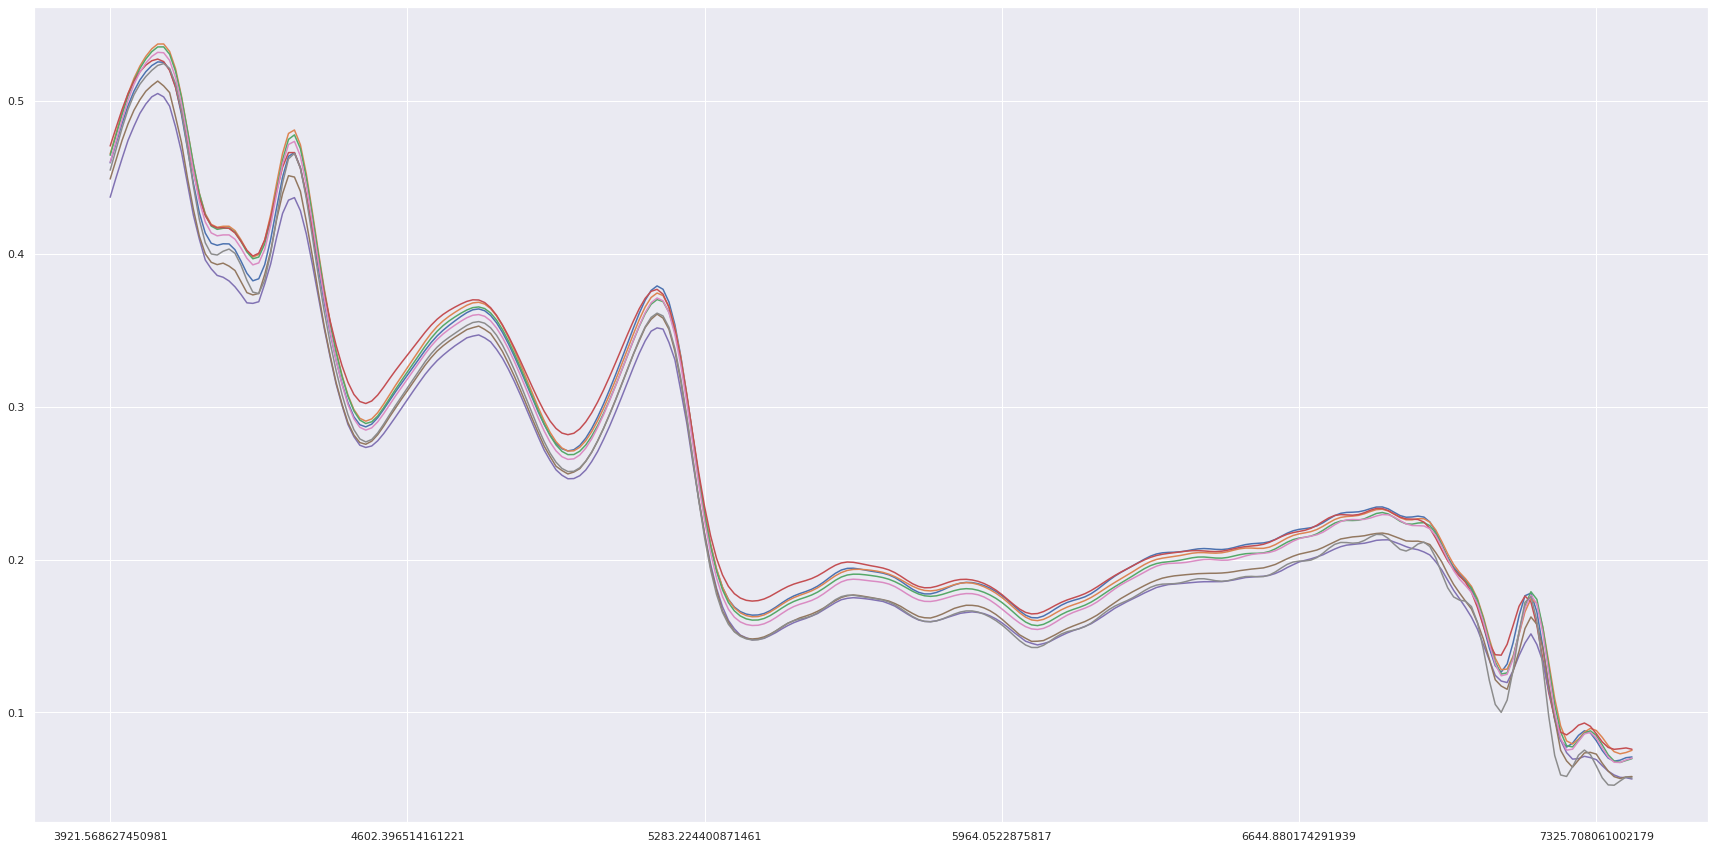

In [108]:
index = 20 # the sample number from 0 to 29
df_52.iloc[index].plot(label='52')
df_122.iloc[index].plot(label='122')
df_169.iloc[index].plot(label='169')
df_171.iloc[index].plot(label='171')
df_190.iloc[index].plot(label='190')
df_10119.iloc[index].plot(label='10119')
df_10121.iloc[index].plot(label='10121')
df_211100001.iloc[index].plot(label='211100001')

In [109]:
df_52_components,_ = PLSRegression(n_components=4).fit_transform(df_52,df_ref)
df_122_components,_ = PLSRegression(n_components=4).fit_transform(df_122,df_ref)
df_169_components,_ = PLSRegression(n_components=4).fit_transform(df_169,df_ref)
df_171_components,_ = PLSRegression(n_components=4).fit_transform(df_171,df_ref)
df_190_components,_ = PLSRegression(n_components=4).fit_transform(df_190,df_ref)
df_10119_components,_ = PLSRegression(n_components=4).fit_transform(df_10119,df_ref)
df_10121_components,_ = PLSRegression(n_components=4).fit_transform(df_10121,df_ref)
df_211100001_components,_ = PLSRegression(n_components=4).fit_transform(df_211100001,df_ref)




In [99]:
df_52 = pd.DataFrame(df_52_components)
df_122 = pd.DataFrame(df_122_components)
df_169 = pd.DataFrame(df_169_components)
df_171 = pd.DataFrame(df_171_components)
df_190 = pd.DataFrame(df_190_components)
df_10119 = pd.DataFrame(df_10119_components)
df_10121 = pd.DataFrame(df_10121_components)
df_211100001 = pd.DataFrame(df_211100001_components)


In [100]:
scanner_names = ['52','122','169','171','190','10119','10121','211100001']
scanners = {'52':df_52,
            '122':df_122,
            '169':df_169,
            '171':df_171,
            '190':df_190,
            '10119':df_10119,
            '10121':df_10121,
            '211100001':df_211100001}
euc_dist = {'52':None,
            '122':None,
            '169':None,
            '171':None,
            '190':None,
            '10119':None,
            '10121':None,
            '211100001':None}

cos_dist = {'52':None,
            '122':None,
            '169':None,
            '171':None,
            '190':None,
            '10119':None,
            '10121':None,
            '211100001':None}


for scanner1 in scanners:
    euc = []
    cos = []
    for scanner2 in scanners:
        mean_dist = 0
        mean_cos = 0
        for i in range(30):
            mean_dist += euclidean(scanners[scanner1].iloc[i],scanners[scanner2].iloc[i])
            mean_cos += cosine(scanners[scanner1].iloc[i],scanners[scanner2].iloc[i])
        mean_dist/=30
        mean_cos/=30
        euc.append(mean_dist)
        cos.append(mean_cos)
    euc_dist[scanner1] = euc
    cos_dist[scanner1] = cos

In [122]:
subject = '122' # the name of the scanner  in the question

idx = sorted(range(len(euc_dist[subject])), key=lambda k: euc_dist[subject][k],reverse=True)
print('Final Report :')
print('=====================================================================================')



print('Scanners sorted upon their average Eucledian similarity from the subject:',subject)

for i in idx:
    print('Scanner:',scanner_names[i],'-> Eucledian distance:',euc_dist[subject][i])
    
print('--------------------------------------------------------------------------------------')
print('Scanners sorted upon their average cosine similarity from the subject:',subject)
idx = sorted(range(len(cos_dist[subject])), key=lambda k: cos_dist[subject][k],reverse=True)
for i in idx:
    print('Scanner:',scanner_names[i],'-> Cosine distance:',cos_dist[subject][i])

Final Report :
Scanners sorted upon their average Eucledian similarity from the subject: 122
Scanner: 10119 -> Eucledian distance: 0.5188038639823307
Scanner: 211100001 -> Eucledian distance: 0.5081444620013881
Scanner: 190 -> Eucledian distance: 0.36021180404041425
Scanner: 10121 -> Eucledian distance: 0.2900859667794873
Scanner: 171 -> Eucledian distance: 0.28945793074261456
Scanner: 52 -> Eucledian distance: 0.24210372318354895
Scanner: 169 -> Eucledian distance: 0.20665988198681787
Scanner: 122 -> Eucledian distance: 0.0
--------------------------------------------------------------------------------------
Scanners sorted upon their average cosine similarity from the subject: 122
Scanner: 211100001 -> Cosine distance: 0.0005086255425517883
Scanner: 10119 -> Cosine distance: 0.00041334666173714987
Scanner: 52 -> Cosine distance: 0.00038790168054865607
Scanner: 171 -> Cosine distance: 0.0003501053525048148
Scanner: 190 -> Cosine distance: 0.000176459534896356
Scanner: 10121 -> Cosine

In [102]:
euc_matrix = pd.DataFrame(euc_dist,index=scanner_names)

[Text(0.5, 0, '52'),
 Text(1.5, 0, '122'),
 Text(2.5, 0, '169'),
 Text(3.5, 0, '171'),
 Text(4.5, 0, '190'),
 Text(5.5, 0, '10119'),
 Text(6.5, 0, '10121'),
 Text(7.5, 0, '211100001')]

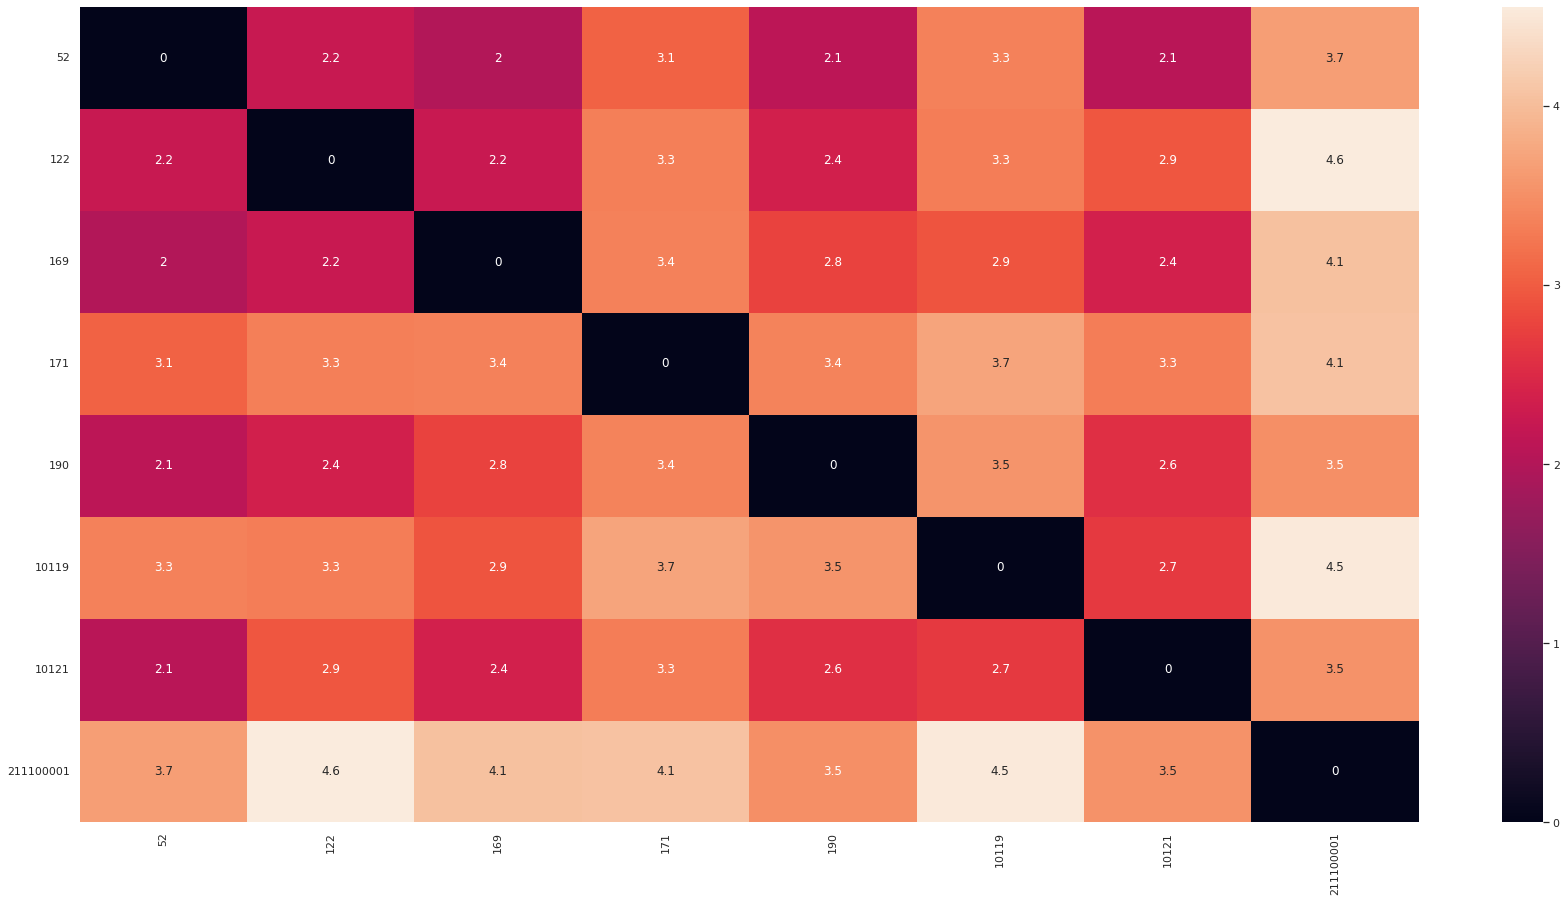

In [103]:
sns.set_theme()
ax = sns.heatmap(euc_matrix,annot=True)
ax.set_yticklabels(ax.get_yticklabels(),rotation = -0)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [116]:
df_52_components = PCA(n_components=4).fit_transform(df_52)
df_122_components = PCA(n_components=4).fit_transform(df_122)
df_169_components = PCA(n_components=4).fit_transform(df_169)
df_171_components = PCA(n_components=4).fit_transform(df_171)
df_190_components = PCA(n_components=4).fit_transform(df_190)
df_10119_components = PCA(n_components=4).fit_transform(df_10119)
df_10121_components = PCA(n_components=4).fit_transform(df_10121)
df_211100001_components = PCA(n_components=4).fit_transform(df_211100001)

In [117]:
scanner_names = ['52','122','169','171','190','10119','10121','211100001']
scanners = {'52':df_52,
            '122':df_122,
            '169':df_169,
            '171':df_171,
            '190':df_190,
            '10119':df_10119,
            '10121':df_10121,
            '211100001':df_211100001}
euc_dist = {'52':None,
            '122':None,
            '169':None,
            '171':None,
            '190':None,
            '10119':None,
            '10121':None,
            '211100001':None}

cos_dist = {'52':None,
            '122':None,
            '169':None,
            '171':None,
            '190':None,
            '10119':None,
            '10121':None,
            '211100001':None}


for scanner1 in scanners:
    euc = []
    cos = []
    for scanner2 in scanners:
        mean_dist = 0
        mean_cos = 0
        for i in range(30):
            mean_dist += euclidean(scanners[scanner1].iloc[i],scanners[scanner2].iloc[i])
            mean_cos += cosine(scanners[scanner1].iloc[i],scanners[scanner2].iloc[i])
        mean_dist/=30
        mean_cos/=30
        euc.append(mean_dist)
        cos.append(mean_cos)
    euc_dist[scanner1] = euc
    cos_dist[scanner1] = cos

In [121]:
subject = '122' # the name of the scanner  in the question

idx = sorted(range(len(euc_dist[subject])), key=lambda k: euc_dist[subject][k],reverse=True)
print('Final Report :')
print('=====================================================================================')



print('Scanners sorted upon their average Eucledian similarity from the subject:',subject)

for i in idx:
    print('Scanner:',scanner_names[i],'-> Eucledian distance:',euc_dist[subject][i])
    
print('--------------------------------------------------------------------------------------')
print('Scanners sorted upon their average cosine similarity from the subject:',subject)
idx = sorted(range(len(cos_dist[subject])), key=lambda k: cos_dist[subject][k],reverse=True)
for i in idx:
    print('Scanner:',scanner_names[i],'-> Cosine distance:',cos_dist[subject][i])

Final Report :
Scanners sorted upon their average Eucledian similarity from the subject: 122
Scanner: 10119 -> Eucledian distance: 0.5188038639823307
Scanner: 211100001 -> Eucledian distance: 0.5081444620013881
Scanner: 190 -> Eucledian distance: 0.36021180404041425
Scanner: 10121 -> Eucledian distance: 0.2900859667794873
Scanner: 171 -> Eucledian distance: 0.28945793074261456
Scanner: 52 -> Eucledian distance: 0.24210372318354895
Scanner: 169 -> Eucledian distance: 0.20665988198681787
Scanner: 122 -> Eucledian distance: 0.0
--------------------------------------------------------------------------------------
Scanners sorted upon their average cosine similarity from the subject: 122
Scanner: 211100001 -> Cosine distance: 0.0005086255425517883
Scanner: 10119 -> Cosine distance: 0.00041334666173714987
Scanner: 52 -> Cosine distance: 0.00038790168054865607
Scanner: 171 -> Cosine distance: 0.0003501053525048148
Scanner: 190 -> Cosine distance: 0.000176459534896356
Scanner: 10121 -> Cosine

In [119]:
euc_matrix = pd.DataFrame(euc_dist,index=scanner_names)

[Text(0.5, 0, '52'),
 Text(1.5, 0, '122'),
 Text(2.5, 0, '169'),
 Text(3.5, 0, '171'),
 Text(4.5, 0, '190'),
 Text(5.5, 0, '10119'),
 Text(6.5, 0, '10121'),
 Text(7.5, 0, '211100001')]

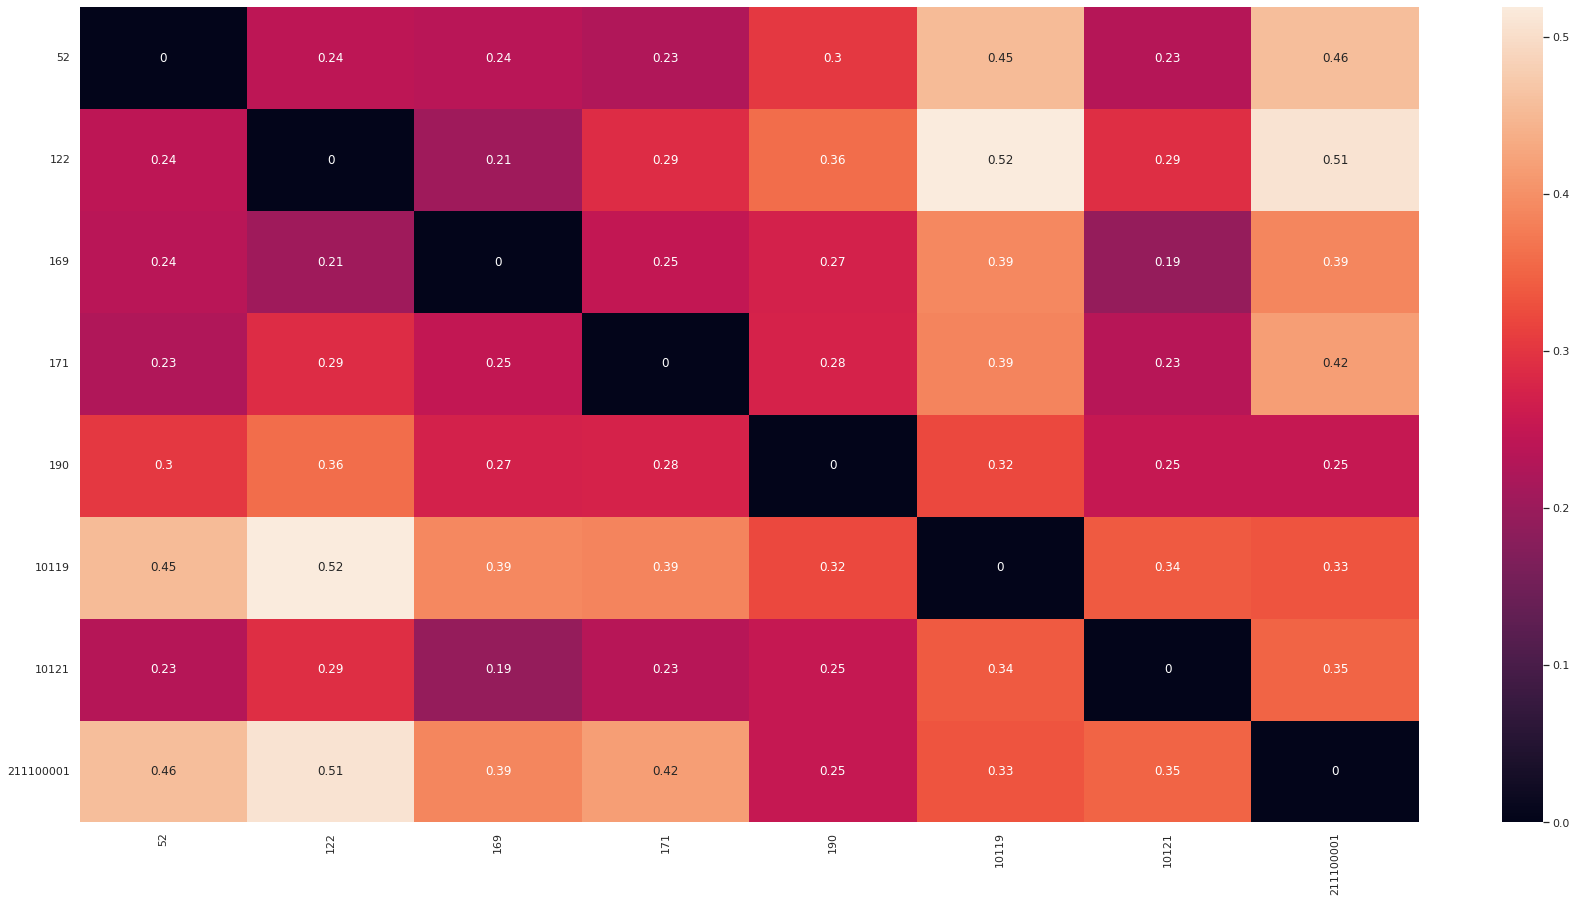

In [120]:
sns.set_theme()
ax = sns.heatmap(euc_matrix,annot=True)
ax.set_yticklabels(ax.get_yticklabels(),rotation = -0)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [124]:
# Import NMF
from sklearn.decomposition import NMF
comp=[]
for i in range (len(scanner_names)):

    # Create an NMF model: model
    model = NMF(n_components=15)

    # Apply fit_transform to samples: features
    features = model.fit_transform(scanners[i])
    
    comp.append(model.components_.ravel())

KeyError: 0